### Malaria prediction models

**Description:** Testing several models on a Malaria Dataset<br>
**Dataset:** https://www.nature.com/articles/s41598-020-72575-6<br>
**Author:** Jaume Manero

In [1]:
#%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor

#https://www.nature.com/articles/s41598-020-72575-6

In [2]:
df_train = pd.read_excel('./data/ibadan_malaria-prevalence_dataset_1996-2017.xlsx',sheet_name='vars-preP_train')
df_val = pd.read_excel('./data/ibadan_malaria-prevalence_dataset_1996-2017.xlsx',sheet_name='vars-preP_val')

In [3]:
# Results Visualization

def result_visualization(y_truth, y_hat, title):

   years_label = ['2015', '2016', '2017']
   months_label = ['jan','feb','mar','abr','may','jun','jul','ago','sep','oct','nov','dec']
   tiks_x = np.arange(len(months_label))
   tiks_y = np.arange(len(years_label))

   arr_a = y_truth
   arr_b = y_hat

   # Validation figure
   fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))

   min_val = min(arr_a.min(), arr_b.min())
   max_val = max(arr_a.max(), arr_b.max())
   
   im_left  = ax1.imshow(y_truth, cmap='YlOrRd', interpolation='nearest', vmin=min_val, vmax=max_val)
   im_right = ax2.imshow(y_hat, cmap='YlOrRd', interpolation='nearest', vmin=min_val, vmax=max_val)

    
   N=5
   ax1.set_xticks(tiks_x, minor=False)
   ax1.set_xticklabels(months_label)
   ax1.set_yticks(tiks_y, minor=False)
   ax1.set_yticklabels(years_label)
   ax1.set_title('Ground Truth')

   ax2.set_xticks(tiks_x, minor=False)
   ax2.set_xticklabels(months_label)
   ax2.set_yticks(tiks_y, minor=False)
   ax2.set_yticklabels(years_label)
   ax2.set_title('Prediction')
   plt.suptitle(title, y=0.7, size = 20)

#   plt.colorbar(im_right)
   plt.show()

In [4]:


# Linear Regression
cols = ['year', 'month', 'nchildren', 'm-age-neg', 'm-age-pos', 'iqr-age-neg',
       'iqr-age-pos', 'x-pd', 'sd-pd', 'mm-rf', 'mmP-rf', 'min-temp',
       'max-temp', 'x-temp']

X = df_train[cols]
y = df_train['preP']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

X_val = df_val[cols]
y_val = df_val['preP']
y_val_hat  = model.predict(X_val)

model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   preP   R-squared (uncentered):                   0.848
Model:                            OLS   Adj. R-squared (uncentered):              0.838
Method:                 Least Squares   F-statistic:                              84.99
Date:                Mon, 11 Apr 2022   Prob (F-statistic):                    3.69e-79
Time:                        16:27:05   Log-Likelihood:                          195.21
No. Observations:                 228   AIC:                                     -362.4
Df Residuals:                     214   BIC:                                     -314.4
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
year            0.0005   9.73e-05      5.603      0.000       0.000       0.001
month           0.0029      0.002      1.281      0.202      -0.002       0.007
nchildren      -0.0003   4.67e-05     -7.370      0.000      -0.000      -0.000
m-age-neg       0.0015      0.001      1.440      0.151      -0.001       0.004
m-age-pos      -0.0015      0.001     -1.381      0.169      -0.004       0.001
iqr-age-neg     0.0002      0.001      0.252      0.801      -0.002       0.002
iqr-age-pos  2.797e-05      0.001      0.050      0.960      -0.001       0.001
x-pd        -1.064e-06   9.78e-07     -1.088      0.278   -2.99e-06    8.64e-07
sd-pd        6.221e-07   7.89e-07      0.789      0.431   -9.32e-07    2.18e-06
mm-rf          -0.0005      0.000     -1.669      0.097      -0.001    8.67e-05
mmP-rf          0.7507      0.392      1.916      0.057      -0.022       1.523
min-temp       -0.0107      0.006     -1.716      0.088      -0.023       0.002
max-temp       -0.0242      0.007     -3.519      0.001      -0.038      -0.011
x-temp          0.0089      0.012      0.772      0.441      -0.014       0.032
==============================================================================
Omnibus:                       27.748   Durbin-Watson:                   0.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.325
Skew:                           0.803   Prob(JB):                     1.29e-08
Kurtosis:                       4.116   Cond. No.                     2.81e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:

names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 
         'PTRATIO', 'B', 'LSTAT', 'MEDV']

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
model = LinearRegression()
scoring = 'r2'
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

R^2: -0.010 (0.003)


In [6]:
# Linear Regression
model_1 = LinearRegression().fit(X, y)
model_1.score(X, y)

y_val_hat = model_1.predict(X_val)

print ('MSE', mean_squared_error(y_val, y_val_hat))
print('r2', r2_score(y_val, y_val_hat))

MSE 0.005026592146941133
r2 -0.07757351653809685


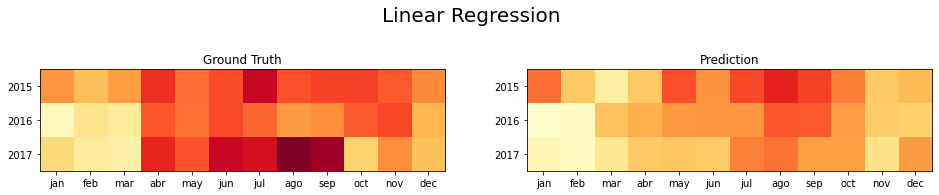

In [7]:
y_truth = y_val.array.reshape(3,12)
y_hat   = y_val_hat.reshape(3,12)
result_visualization(y_truth, y_hat, 'Linear Regression')

In [8]:
# Random Forests
model_2 = RandomForestRegressor(n_estimators = 10000, max_depth=100, random_state = 42).fit(X,y)

y_val_hat = model_2.predict(X_val)

print ('MSE', mean_squared_error(y_val, y_val_hat))
print('r2', r2_score(y_val, y_val_hat))

MSE 0.0039057187992715056
r2 0.16271322237649644


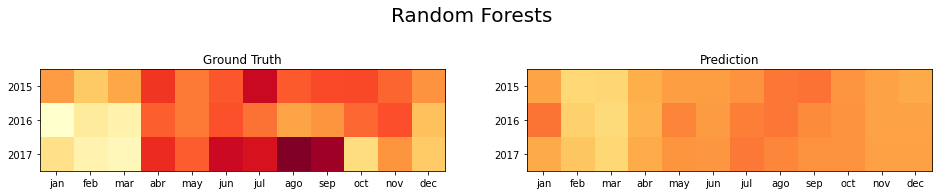

In [9]:
y_truth = y_val.array.reshape(3,12)
y_hat   = y_val_hat.reshape(3,12)
result_visualization(y_truth, y_hat, 'Random Forests')

In [10]:
#SVM support vector machine
from sklearn.svm import SVR
#model_3 = SVR(kernel = 'rbf').fit(X,y)
model_3 = SVR(kernel="poly").fit(X,y)
y_val_hat = model_3.predict(X_val)

print ('MSE', mean_squared_error(y_val, y_val_hat))
print('r2', r2_score(y_val, y_val_hat))

MSE 0.007376569985539594
r2 -0.581348998872808


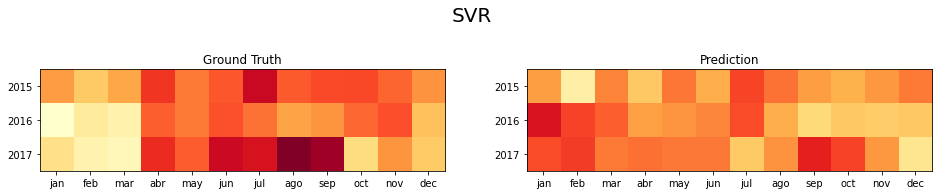

In [11]:
y_truth = y_val.array.reshape(3,12)
y_hat   = y_val_hat.reshape(3,12)
result_visualization(y_truth, y_hat, 'SVR')

In [12]:
# xgboost
from xgboost import XGBRegressor

model_4 = XGBRegressor().fit(X,y)
y_val_hat = model_4.predict(X_val)

print ('MSE', mean_squared_error(y_val, y_val_hat))
print('r2', r2_score(y_val, y_val_hat))

MSE 0.0033473013968248005
r2 0.2824237114036884


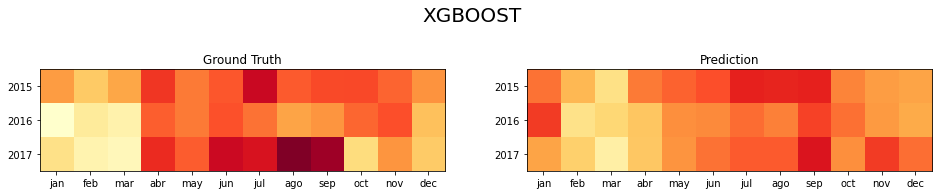

In [13]:
y_truth = y_val.array.reshape(3,12)
y_hat   = y_val_hat.reshape(3,12)
result_visualization(y_truth, y_hat, 'XGBOOST')